In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:

df = pd.read_csv("C:\\Users\\USER\\Desktop\\fraud financial\\fraud financial\\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
import pandas as pd

# Assuming df is your DataFrame
value_counts = df['isFraud'].value_counts()

print(value_counts)


isFraud
0    6354407
1       8213
Name: count, dtype: int64


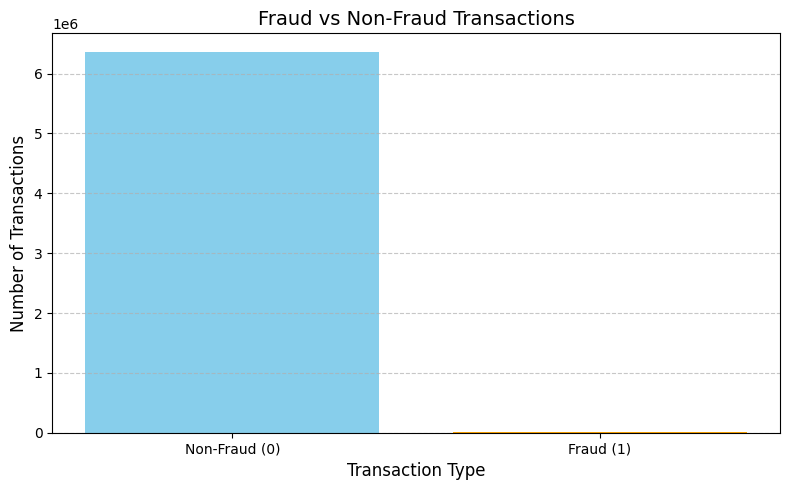

In [4]:
import matplotlib.pyplot as plt

# Value counts (from the provided data)
value_counts = {0: 6354407, 1: 8213}

# Extract keys and values for plotting
labels = ['Non-Fraud (0)', 'Fraud (1)']
values = list(value_counts.values())

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'orange'])
plt.title('Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.utils import resample


In [6]:
# Assuming df is your DataFrame
df_majority = df[df['isFraud'] == 0]
df_minority = df[df['isFraud'] == 1]


In [7]:
# Downsample majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False, # sample without replacement
                                    n_samples=len(df_minority), # to match minority class
                                    random_state=42) # for reproducibility



In [8]:
df_undersampled = pd.concat([df_majority_undersampled, df_minority])


In [9]:
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [10]:
df=df_undersampled

In [11]:
# Check the number of rows and columns
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 16426
Number of Columns: 11


In [12]:
# Check the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.4+ MB


In [13]:
# Describe the numerical values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,16426.000000,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000,16426.000000
mean,306.441556,8.248655e+05,1.242838e+06,5.257872e+05,8.311948e+05,1.260807e+06,0.500000,0.000974
std,193.321590,1.862573e+06,3.252860e+06,2.505016e+06,3.484266e+06,3.864760e+06,0.500015,0.031196
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,161.000000,3.815791e+04,1.035827e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,283.000000,1.752676e+05,1.212709e+05,0.000000e+00,0.000000e+00,1.297782e+05,0.500000,0.000000
75%,410.000000,5.404362e+05,7.979333e+05,0.000000e+00,5.283537e+05,1.091986e+06,1.000000,0.000000
max,743.000000,3.147911e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [14]:
# Check for Null values
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [15]:
df [df['isFraud'] == 1].shape

(8213, 11)

In [16]:
df [df['isFraud'] == 0].shape

(8213, 11)

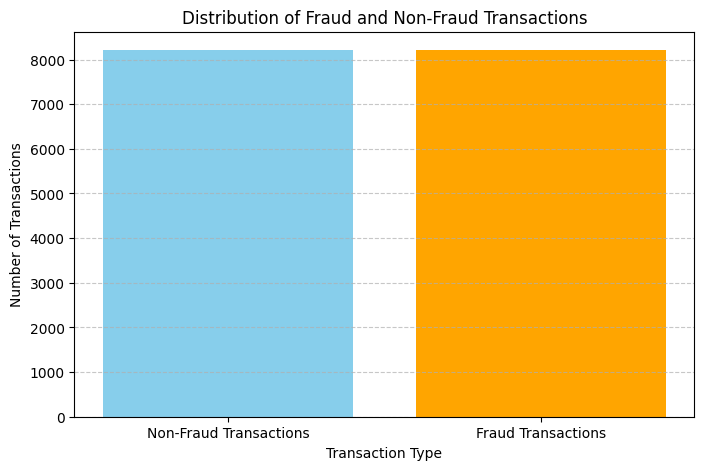

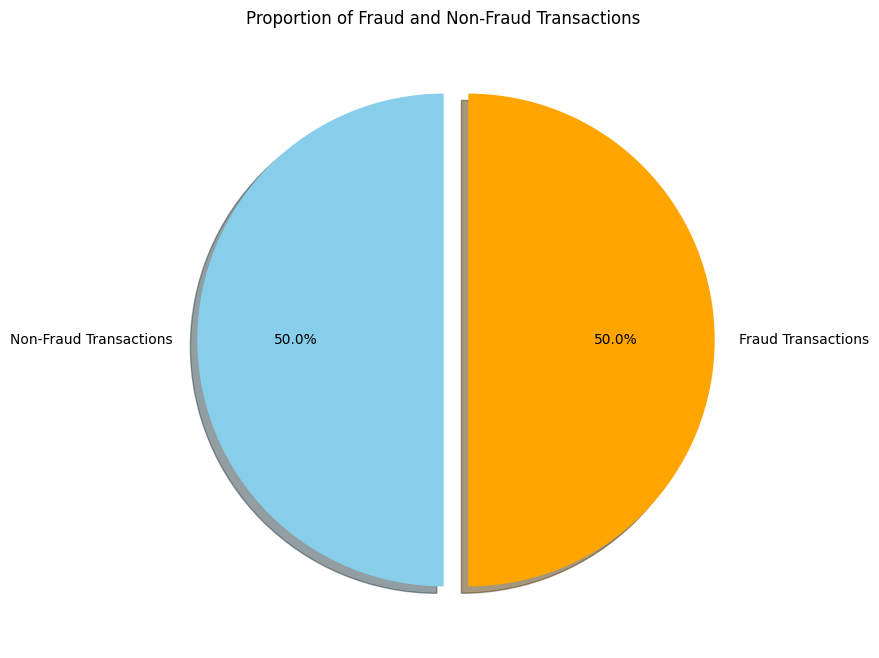

In [17]:
import matplotlib.pyplot as plt

# Values for each category
non_fraud_count = 8213  # From df[df['isFraud'] == 0].shape
fraud_count = 8213      # From df[df['isFraud'] == 1].shape

# Labels and counts
labels = ['Non-Fraud Transactions', 'Fraud Transactions']
counts = [non_fraud_count, fraud_count]

# Plotting a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['skyblue', 'orange'])
plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.ylabel('Number of Transactions')
plt.xlabel('Transaction Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'orange'],
    explode=(0, 0.1),  # Highlight the fraud transactions
    shadow=True,
)
plt.title('Proportion of Fraud and Non-Fraud Transactions')
plt.show()


In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,496,TRANSFER,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
1,365,TRANSFER,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
2,302,PAYMENT,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
3,383,PAYMENT,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
4,354,CASH_OUT,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16421,273,TRANSFER,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
16422,336,TRANSFER,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
16423,18,CASH_OUT,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
16424,249,CASH_IN,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the label encoder and transform the 'type' column
df['type'] = le.fit_transform(df['type'])

# Check the mapping of types to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Display the first few rows of the updated dataframe
df.head()


Label Mapping: {'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,496,4,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.0,1,0
1,365,4,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.0,1,0
2,302,3,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.0,0,0
3,383,3,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.0,0,0
4,354,1,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.4,0,0


In [21]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,496,4,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
1,365,4,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
2,302,3,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
3,383,3,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
4,354,1,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16421,273,4,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
16422,336,4,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
16423,18,1,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
16424,249,0,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


# ML Algorithms

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,496,4,766151.45,C2014325113,766151.45,0.00,C432435900,0.00,0.00,1,0
1,365,4,31315.51,C1174332140,31315.51,0.00,C1252332991,0.00,0.00,1,0
2,302,3,19043.02,C562601456,70067.00,51023.98,M1194092449,0.00,0.00,0,0
3,383,3,11162.03,C1407068513,102921.00,91758.97,M175386067,0.00,0.00,0,0
4,354,1,268851.80,C626747845,220431.00,0.00,C833477591,1641753.59,1910605.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16421,273,4,159106.12,C1424958936,159106.12,0.00,C1471537489,0.00,0.00,1,0
16422,336,4,170038.31,C498550702,170038.31,0.00,C982724683,0.00,0.00,1,0
16423,18,1,8369.07,C2091064188,23265.00,14895.93,C1185878430,70063.42,78432.50,0,0
16424,249,0,262120.50,C12781138,8127067.18,8389187.68,C449378182,407941.21,145820.71,0,0


# Naive Bayes

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [24]:
# Define features and target variable
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'])  # Drop non-numeric columns or those not used in the model
y = df['isFraud']

# Convert categorical columns to dummy variables if needed
X = pd.get_dummies(X, columns=['type'], drop_first=True)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()  # Use MultinomialNB() if your features are counts or discrete
model.fit(X_train, y_train)


GaussianNB()

In [27]:
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent']))


                precision    recall  f1-score   support

Non-Fraudulent       0.68      0.94      0.79      2484
    Fraudulent       0.90      0.56      0.69      2444

      accuracy                           0.75      4928
     macro avg       0.79      0.75      0.74      4928
  weighted avg       0.79      0.75      0.74      4928



# Support vector Classifer

In [28]:
from sklearn.svm import SVC
model= SVC(kernel='rbf', random_state=42) # Set eval_metric and random_state for reproducibility
model.fit(X_train, y_train)


SVC(random_state=42)

In [29]:
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent']))


                precision    recall  f1-score   support

Non-Fraudulent       0.77      0.99      0.86      2484
    Fraudulent       0.98      0.70      0.81      2444

      accuracy                           0.84      4928
     macro avg       0.87      0.84      0.84      4928
  weighted avg       0.87      0.84      0.84      4928



 # Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Non-Fraudulent       0.92      0.90      0.91      2484
    Fraudulent       0.90      0.92      0.91      2444

      accuracy                           0.91      4928
     macro avg       0.91      0.91      0.91      4928
  weighted avg       0.91      0.91      0.91      4928



C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#  Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Non-Fraudulent', 'Fraudulent']))

                precision    recall  f1-score   support

Non-Fraudulent       1.00      0.99      0.99      2484
    Fraudulent       0.99      1.00      0.99      2444

      accuracy                           0.99      4928
     macro avg       0.99      0.99      0.99      4928
  weighted avg       0.99      0.99      0.99      4928



In [32]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [33]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import gradio as gr
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Label mapping for 'type'
type_mapping = {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

# Function to preprocess and predict
def predict_fraud(amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, transaction_type):
    step = 350  # Default value for step

    # Map the transaction type to its corresponding number
    transaction_type_encoded = type_mapping[transaction_type]

    # Create a DataFrame for the single input
    input_data = pd.DataFrame({
        'step': [step],
        'amount': [amount],
        'oldbalanceOrg': [oldbalanceOrg],
        'newbalanceOrig': [newbalanceOrig],
        'oldbalanceDest': [oldbalanceDest],
        'newbalanceDest': [newbalanceDest],
        'type': [transaction_type_encoded]
    })

    # One-hot encode the 'type' column to match training data format
    input_data = pd.get_dummies(input_data, columns=['type'])

    # Ensure the columns match the model's training data
    # Fill missing columns with 0
    for col in ['type_1', 'type_2', 'type_3', 'type_4']:
        if col not in input_data.columns:
            input_data[col] = 0

    # Drop any extra columns not in the model's training data
    input_data = input_data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 
                             'oldbalanceDest', 'newbalanceDest', 'type_1', 'type_2', 
                             'type_3', 'type_4']]

    # Predict using the model
    prediction = model.predict(input_data)[0]
    label = "Fraudulent" if prediction == 1 else "Non-Fraudulent"
    
    return label

# Define the Gradio interface
interface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Amount"),
        gr.Number(label="Old Balance (Origin)"),
        gr.Number(label="New Balance (Origin)"),
        gr.Number(label="Old Balance (Destination)"),
        gr.Number(label="New Balance (Destination)"),
        gr.Dropdown(choices=list(type_mapping.keys()), label="Transaction Type")
    ],
    outputs="text",
    title="Fraud Detection System",
    description="Enter transaction details to check if it is fraudulent or non-fraudulent."
)

# Launch the app
interface.launch()


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
